In [ ]:
#Çağrı Doğuş İyican 20650

In [48]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy import stats
from os.path import join

import warnings 
warnings.simplefilter('ignore')


df = pd.read_csv(r"C:\Users\Çağrı Doğuş İyican\Desktop\CS 210\taxi-trips.csv", engine='python')


df.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [49]:
#Types of every column in data
df.dtypes


id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [50]:
df.dropoff_longitude.head()

0   -73.964630
1   -73.973000
2   -73.978500
3   -73.953201
4   -73.998993
Name: dropoff_longitude, dtype: float64

In [51]:
df[111111:111112]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
111111,id1550290,2,2016-03-12 23:16:06,2016-03-12 23:55:20,1,-73.971291,40.760979,-73.859497,40.680431,N,2354


In [52]:
#Applying reverse geocoding to get the exact district data with using longitude and lattitude data for each trip.

import reverse_geocoder as rg

df_c=df.copy()

newlist=list()
newlist2=list()

coomatrix=list(map(tuple, df.iloc[:, [6,5]].values))

pdistrict=rg.search(coomatrix)
print(pdistrict)
for i in pdistrict:
    newlist.append(i["name"])

df["pickup_district"]=newlist

coomatrix2=list(map(tuple, df.iloc[:,[8,7]].values))
ddistrict=rg.search(coomatrix2)

for i in ddistrict:
    newlist2.append(i["name"])

df["dropofdistrict"]=newlist2


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [53]:
#calculation of distance of each trip 

distancelist=list()
from geopy.distance import great_circle

for i in range (df.shape[0]):
    coomatrix1=df.iloc[i,5]
    coomatrix5=df.iloc[i,6]
    coomatrix3=df.iloc[i,7]
    coomatrix4=df.iloc[i,8]
    x= (coomatrix5,coomatrix1)
    y = (coomatrix4, coomatrix3)
    distancelist.append(great_circle(x,y).miles)


df["distance"]=distancelist
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropofdistrict,distance
118180,id3274818,2,2016-03-11 21:04:31,2016-03-11 21:08:41,2,-73.978233,40.763203,-73.982498,40.766701,N,250,Manhattan,Manhattan,0.328978
118181,id2224211,1,2016-03-06 10:42:32,2016-03-06 10:46:57,1,-73.987488,40.768585,-73.979660,40.759151,N,265,Manhattan,Manhattan,0.769845
118182,id3537077,2,2016-03-11 23:48:13,2016-03-12 00:01:36,1,-73.992729,40.752811,-73.987862,40.731930,N,803,Weehawken,New York City,1.465113
118183,id3482902,1,2016-03-01 07:21:04,2016-03-01 07:23:36,1,-73.974693,40.756088,-73.969971,40.762115,N,152,Long Island City,Manhattan,0.484264
118184,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,777,New York City,New York City,2.470292


In [54]:
#Finding top 5 districts of the passengers(Pickup and droppoff)

tripfreqpick=df.groupby(["pickup_district"]).count().sort_values("id",ascending=False).head(5)
tripfreqpick

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropofdistrict,distance
pickup_district,,,,,,,,,,,,,
Manhattan,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329
New York City,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625
Long Island City,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787
Weehawken,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334
The Bronx,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777


In [55]:
#Finding top 5 districts of the passengers(Pickup and droppoff)
tripfreqdrop=df.groupby(["dropofdistrict"]).count().sort_values("id",ascending=False).head(5)
tripfreqdrop

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,distance
dropofdistrict,,,,,,,,,,,,,
Manhattan,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478
New York City,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082
Long Island City,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919
Weehawken,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621
Brooklyn,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059


In [56]:
#understanding and manipulating time horizons using Datetime assigning ranges for each time horizon
datelist=[]
timelist=[]
for i in range (118185):
    datelist.append(df["pickup_datetime"][i]) 
    
datelist = pd.to_datetime(datelist) 


for i in range(118185):
   
        if  (7<= datelist[i].hour < 9)    :
        
            timelist.append("Rushhour_morning")
    
        elif (9<= datelist[i].hour < 16)  :
        
            timelist.append("afternoon")
    
        elif (16<= datelist[i].hour < 18) :
        
            timelist.append("rushhourevening")
    
        elif (18<= datelist[i].hour < 23) :
        
            timelist.append("evening")
    
        else  :
        
            timelist.append("latenight")


df["Time_Region"]=timelist

In [57]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropofdistrict,distance,Time_Region
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rushhourevening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,Rushhour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032,latenight


Text(0.5, 1.0, 'Relation between Trip duration and Time region of the day')

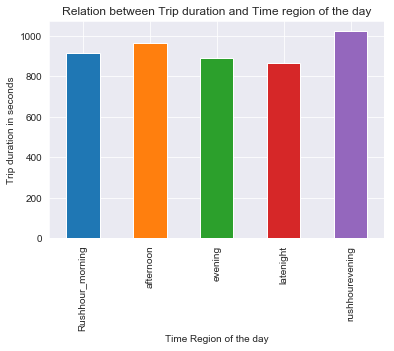

In [58]:
#Understanding the realtion between the Time horizons and trip durations using graphs
a=df.groupby(by="Time_Region")["trip_duration"].mean()
new_plot=a.plot(kind="bar", legend=None)

new_plot.set_xlabel("Time Region of the day")
new_plot.set_ylabel("Trip duration in seconds")
new_plot.set_title("Relation between Trip duration and Time region of the day")



Text(0.5, 1.0, 'Relation between Trip distance and Time region of the day')

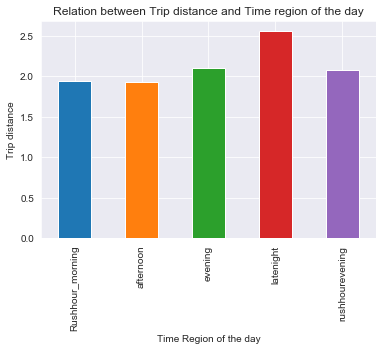

In [59]:
#Understanding the relation between the Time horizons and distance using graphs


b=df.groupby(by="Time_Region")["distance"].mean()
new_plot=b.plot(kind="bar", legend=None)

new_plot.set_xlabel("Time Region of the day")
new_plot.set_ylabel("Trip distance")
new_plot.set_title("Relation between Trip distance and Time region of the day")

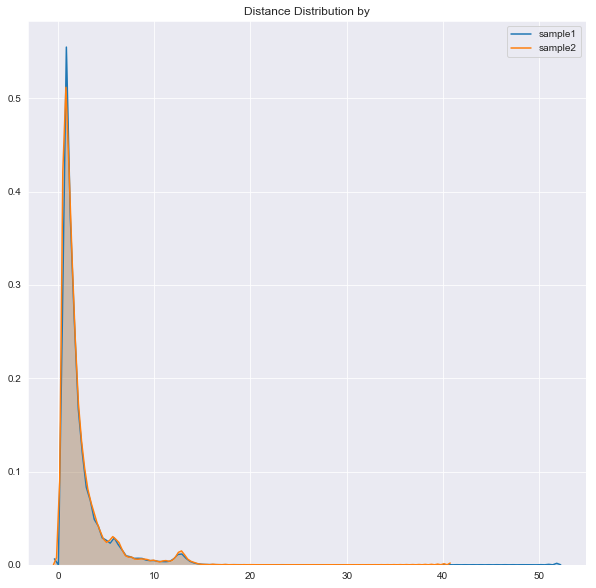

In [60]:
#Plotting our samples according to the values that I have selected(which is 2) 
import seaborn as sns
sns.set_style("darkgrid")
df_c=df
sample1=df_c[df_c["passenger_count"] <2 ]["distance"]
sample2=df_c[df_c["passenger_count"] >=2 ]["distance"]
fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.kdeplot(sample1, shade=True, ax=ax, label="sample1")
sns.kdeplot(sample2, shade=True, ax=ax, label="sample2")

plt.title("Distance Distribution by")
plt.show()

In [61]:
#Applying t-test
stats.ttest_ind(sample1,sample2 , equal_var=False)

#If we set the significance level as 0.05, we can reject the null hypothesis


Ttest_indResult(statistic=-4.906440037383832, pvalue=9.298221621573752e-07)

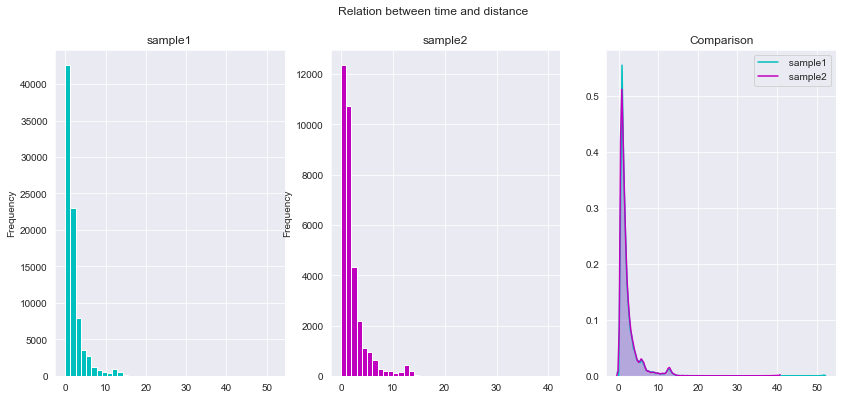

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  
        
sample1.plot(kind="hist", ax=ax[0], bins=40, label="sample1", color="c")
ax[0].set_title("sample1")

sample2.plot(kind="hist", ax=ax[1], bins=40, label="sample2", color="m")
ax[1].set_title("sample2")

sns.kdeplot(sample1, shade=True, label=" sample1", ax=ax[2], color="c")
sns.kdeplot(sample2, shade=True, label=" sample2", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("Relation between time and distance")
plt.show()

In [63]:
sample1.mean()

2.0884494629730885

In [64]:
sample2.mean()

2.165185974919014

In [65]:
#Using Anova to get more imformation about the realation between trip durations and passenger size

s1=df_c[df_c["passenger_count"] ==1 ]["distance"]
s2=df_c[df_c["passenger_count"] ==2 ]["distance"]
s3=df_c[df_c["passenger_count"] ==3 ]["distance"]
s4=df_c[df_c["passenger_count"] ==4 ]["distance"]
s5=df_c[df_c["passenger_count"] >4 ]["distance"]

stats.f_oneway(s1, s2, s3, s4, s5)
#According to Anova results If we set the significance level as 0.05, we can reject the null hypothesis which that Passenger group size has an effect on distance.

F_onewayResult(statistic=9.07773127262933, pvalue=2.50357213179965e-07)

In [66]:
print(s1.mean())

print(s4.mean())

2.088456108959317
2.127494350513016


In [67]:
#Creating new column based of the information about the day of the week of each transportation

arr=[]
for item in datelist:
    arr.append(pd.Timestamp.day_name(item))
df["Day_name"]=arr

In [68]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropofdistrict,distance,Time_Region,Day_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rushhourevening,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,evening,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,Rushhour_morning,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,afternoon,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon,Monday
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830,evening,Saturday
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357,evening,Wednesday
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228,afternoon,Wednesday
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282,evening,Thursday
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032,latenight,Monday


In [69]:
#Creating samples and their corresponded weekends-trip durations and weekdays-trip- durations to analyze if there is a relation 
#if there is an effect of the weekends in the trip durations 



Sample1=df.loc[df["Day_name"].isin(["Saturday","Sunday"])]["trip_duration"]
Sample2=df.loc[df["Day_name"].isin(["Monday","Tuesday","Wednesday","Thursday","Friday"])]["trip_duration"]

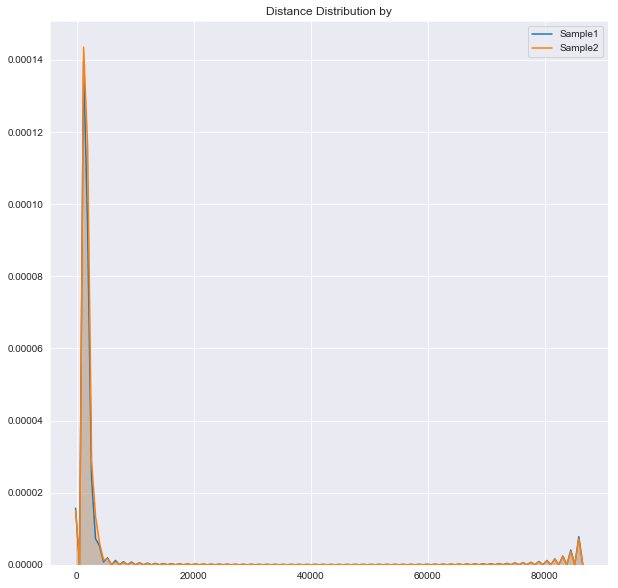

In [70]:

fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.kdeplot(Sample1, shade=True, ax=ax, label="Sample1")
sns.kdeplot(Sample2, shade=True, ax=ax, label="Sample2")

plt.title("Distance Distribution by")
plt.show()

In [71]:
stats.ttest_ind(Sample1, Sample2,equal_var=False)
#Statistical T-test shows that we are going to reject null hypothesis. If we set the significance level as 0.05, we can reject the null hypothesis
# so the day of the week has effect on trip durations

Ttest_indResult(statistic=-2.361713377689828, pvalue=0.018193740149220382)